## IIIb- Image augmentation

As seen when exploring the dataset, there is a class imbalance when considering our labels, with the <i>labels</i> 'Normal', 'Others', and 'Diabetes' representing most of the dataset.

In [7]:
import pandas as pd
import numpy as np
import os
import cv2
import shutil

df=pd.read_csv('dataframe_ODIR.csv')
df.head()

,Unnamed: 0,ID,Patient Age,Patient Sex,Fundus,Diagnostic Keywords,N,D,G,C,A,M,H,O,Labels
0,0,0,69,Female,0_left.jpg,cataract,0,0,0,1,0,0,0,0,Cataract
1,0,0,69,Female,0_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
2,1,1,57,Male,1_left.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
3,1,1,57,Male,1_right.jpg,normal fundus,1,0,0,0,0,0,0,0,Normal
4,2,2,42,Male,2_left.jpg,laser spot,0,0,0,0,0,0,0,1,Others


Below I assess how many rows, hence images, there is per class / <i>label</i>.

In [8]:
print('The are',df.value_counts().sum(),'fundi total when considering all labels distributed as follow :')
df['Labels'].value_counts()

The are 7326 fundi total when considering all labels distributed as follow :


Normal          3088
Diabetes        1657
Others          1503
Glaucoma         243
Myopia           242
Cataract         222
AMD              216
Hypertension     155
Name: Labels, dtype: int64

### Sorting out the images

This class imbalance needs to be addressed prior training our model. 

To do so, I will artificially expand the image dataset using data augmentation.

Below I set the source and future destinations path and then sort out the images per labels/class.

In [9]:
# Paths: 
PATH_SRC = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/2-ODIR-5K_Training_Processed'            # Source
PATH_DST = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized'           # Images sorted out per class/label
PATH_DST_AUG = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3b-ODIR-5K_Training_Augmented'       # Augmented images

# Labels / Classes of interest:                    
classes_columns = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Others']

In [10]:
if ~os.path.exists(PATH_DST):
    os.makedirs(PATH_DST)

In [11]:
# Copy images in corresponding folders :
for classe in classes_columns:
    dst = PATH_DST+'/'+classe
    if ~os.path.exists(dst):
        os.makedirs(dst, exist_ok=True)
    lst= df[df.Labels==classe].Fundus.tolist()
    print(f'Copy class {classe} in progress')
    for file in lst:
        src = os.path.join(PATH_SRC,file)
        shutil.copy(src, dst)

Copy class Normal in progress
Copy class Diabetes in progress
Copy class Glaucoma in progress
Copy class Cataract in progress
Copy class AMD in progress
Copy class Hypertension in progress
Copy class Myopia in progress
Copy class Others in progress


### Image data generator

Now I generate the images to compensate the class imbalance. 

Many criteria are available for data augmentation, however I will mostly play on the: 
- zoom_range, though there are limits here to use this feature as the pictures and online information tend to indicate it is unlikely that an X-time zoom-in picture would have any medical relevance (yet to be confirmed by experts),
- horizontal_flip, which will generate further left- or right- fundi, depending on the image used as input for the generator,
- rotation_range, which will also be limited here as there are anatomical limitations with the arteries always emerging from the external side of the fundi, and never from the upper or lower side of it,
- brightness, to take into account the differences that can be observed across the original images.

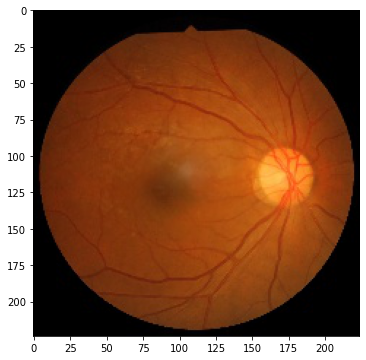

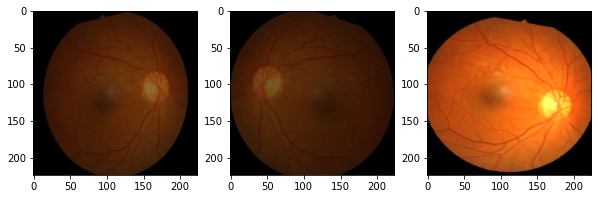

In [12]:
# Imports: 
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Path (Test image):
IMAGE_PATH = "/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/2-ODIR-5K_Training_Processed/20_right.jpg"

#Loads image in from the set image path
img = tf.keras.utils.load_img(IMAGE_PATH, target_size= (224,224))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)#Allows us to properly visualize our image by rescaling values in array
img_tensor /= 255.#Plots image
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

#Load in image path:
img = tf.keras.utils.load_img(IMAGE_PATH, target_size= (224,224))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Use ImageDataGenerator to process the test image:
datagen_test=ImageDataGenerator(
    data_format='channels_last',
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    fill_mode='nearest',
    brightness_range=[0.4,1.8])
pic = datagen_test.flow(img_tensor, batch_size =1)

# Set the layout and plot to display the images 
# (original picture + 3 images generated through our function)
plt.figure(figsize=(10,8))
for i in range(1,4):
    plt.subplot(1, 3, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)
    
#Plots our figures
plt.show()

### Image augmentation

Below I apply this process on all the images previously processed, considering :

1) the non-equalized images

In [7]:
if ~os.path.exists(PATH_DST_AUG):
    os.makedirs(PATH_DST_AUG)

In [8]:
# Criteria for data augmentation:
datagen = ImageDataGenerator(
    data_format='channels_last',
    zoom_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    fill_mode='nearest',
    brightness_range=[0.4,1.6])

In [9]:
# Copy all generated pictures in a repository:
print(f'Number in class N : 3088')
for classe in classes_columns:

    if ~os.path.exists(PATH_DST_AUG+'/'+classe):
        os.makedirs(PATH_DST_AUG+'/'+classe, exist_ok=True)
    list_file = os.listdir(PATH_DST+'/'+classe)
    n = len(list_file)
    k = round(3088/n)
    print(f'classe : {classe}  initial quantity image:  {n}   Ratio: {k}  => Final quantity image : {n*k}')

    for file in list_file:
        file_image = PATH_DST+'/'+classe+'/'+file
        #print('file_image : ' , file_image)

        image = cv2.imread(file_image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image,0)
        datagen.fit(image)
        for x, val in zip(datagen.flow(image,
                                       save_to_dir=os.path.join(PATH_DST_AUG,classe),
                                       save_prefix=file[:-4],
                                       save_format='png'),range(k-1)) :
            x_tmp = x
            val_tmp = val


Number in class N : 3088
classe : Normal  initial quantity image:  3086   Ratio: 1  => Final quantity image : 3086
classe : Diabetes  initial quantity image:  1652   Ratio: 2  => Final quantity image : 3304
classe : Glaucoma  initial quantity image:  243   Ratio: 13  => Final quantity image : 3159
classe : Cataract  initial quantity image:  222   Ratio: 14  => Final quantity image : 3108
classe : AMD  initial quantity image:  216   Ratio: 14  => Final quantity image : 3024
classe : Hypertension  initial quantity image:  155   Ratio: 20  => Final quantity image : 3100
classe : Myopia  initial quantity image:  242   Ratio: 13  => Final quantity image : 3146
classe : Others  initial quantity image:  1379   Ratio: 2  => Final quantity image : 2758


2) for equalized images

Since I processed the images with and without equalization, I decide to run the same image augmentation process on the equalized fundi :

In [10]:
PATH_SRC_EQ = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/2-ODIR-5K_Training_Processed_Equal'            # Source
PATH_DST_EQ = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized'           # Images sorted out per class/label
PATH_DST_EQ_AUG = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4b-ODIR-5K_Training_Equal_Augmented'   

In [11]:
if ~os.path.exists(PATH_DST_EQ):
    os.makedirs(PATH_DST_EQ)

In [12]:
# Copie images in corresponding folders :
for classe in classes_columns:
    dst = PATH_DST_EQ+'/'+classe
    if ~os.path.exists(dst):
        os.makedirs(dst, exist_ok=True)
    lst= df[df.Labels==classe].Fundus.tolist()
    print(f'Copy class {classe} in progress')
    for file in lst:
        src = os.path.join(PATH_SRC_EQ,file)
        shutil.copy(src, dst)


Copy class Normal in progress
Copy class Diabetes in progress
Copy class Glaucoma in progress
Copy class Cataract in progress
Copy class AMD in progress
Copy class Hypertension in progress
Copy class Myopia in progress
Copy class Others in progress


In [14]:
if ~os.path.exists(PATH_DST_EQ_AUG):
    os.makedirs(PATH_DST_EQ_AUG)

In [15]:
print(f'Number in class N : 3088')
for classe in classes_columns:

    if ~os.path.exists(PATH_DST_EQ_AUG+'/'+classe):
        os.makedirs(PATH_DST_EQ_AUG+'/'+classe, exist_ok=True)
    list_file = os.listdir(PATH_DST_EQ+'/'+classe)
    n = len(list_file)
    k = round(3088/n)
    print(f'classe : {classe}  initial quantity image:  {n}   Ratio: {k}  => Final quantity image : {n*k}')

    for file in list_file:
        file_image = PATH_DST_EQ+'/'+classe+'/'+file
        #print('file_image : ' , file_image)

        image = cv2.imread(file_image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image,0)
        datagen.fit(image)
        for x, val in zip(datagen.flow(image,
                                       save_to_dir=os.path.join(PATH_DST_EQ_AUG,classe),
                                       save_prefix=file[:-4],
                                       save_format='png'),range(k-1)) :
            x_tmp = x
            val_tmp = val

Number in class N : 3088
classe : Normal  initial quantity image:  3086   Ratio: 1  => Final quantity image : 3086
classe : Diabetes  initial quantity image:  1652   Ratio: 2  => Final quantity image : 3304
classe : Glaucoma  initial quantity image:  243   Ratio: 13  => Final quantity image : 3159
classe : Cataract  initial quantity image:  222   Ratio: 14  => Final quantity image : 3108
classe : AMD  initial quantity image:  216   Ratio: 14  => Final quantity image : 3024
classe : Hypertension  initial quantity image:  155   Ratio: 20  => Final quantity image : 3100
classe : Myopia  initial quantity image:  242   Ratio: 13  => Final quantity image : 3146
classe : Others  initial quantity image:  1379   Ratio: 2  => Final quantity image : 2758


### Sampling the processed images

Now that the images are processed and augmented, I create a smaller copy of the newly created files in order to save some time during the training of the model and be able to adjust it in a timely manner. 

I do this process for both equalized and non-equalized sets of images.

In [13]:
# Copy of 100 images per class : non-equalized pictures

PATH_DST_LIM = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3c-ODIR-5K_Training_limited'

if ~os.path.exists(PATH_DST_LIM):
    os.makedirs(PATH_DST_LIM)


for classe in classes_columns:
    print(classe)

    if ~os.path.exists(PATH_DST_LIM+'/'+classe):
        os.makedirs(PATH_DST_LIM+'/'+classe)
    list_file = os.listdir(PATH_DST+'/'+classe)[0:99]
    n = len(list_file)
    k=1
    for file in list_file:
        file_image = PATH_DST+'/'+classe+'/'+file
        print('file_image : ' , file_image)

        image = cv2.imread(file_image, cv2.IMREAD_COLOR)
        cv2.imwrite(os.path.join(os.path.join(PATH_DST_LIM,classe), file), image)

Normal
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/2342_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/3407_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/2343_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/3294_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/940_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/859_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/2547_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/3a-ODIR-5K_Training_Organized/Normal/3276_left.jpg
file_image :  /Users/us

In [17]:
# Copy of 100 images per class : equalized pictures

PATH_DST_EQ_LIM = '/Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4c-ODIR-5K_Training_Equal_limited'

if ~os.path.exists(PATH_DST_EQ_LIM):
    os.makedirs(PATH_DST_EQ_LIM)


# copie de 100 images dans un repertoire pour chaque classe
for classe in classes_columns:
    print(classe)

    if ~os.path.exists(PATH_DST_EQ_LIM+'/'+classe):
        os.makedirs(PATH_DST_EQ_LIM+'/'+classe)
    list_file = os.listdir(PATH_DST_EQ+'/'+classe)[0:99]
    n = len(list_file)
    k=1
    for file in list_file:
        file_image = PATH_DST_EQ+'/'+classe+'/'+file
        print('file_image : ' , file_image)

        image = cv2.imread(file_image, cv2.IMREAD_COLOR)
        cv2.imwrite(os.path.join(os.path.join(PATH_DST_EQ_LIM,classe), file), image)

Normal
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/2342_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/3407_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/2343_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/3294_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/940_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/859_left.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organized/Normal/2547_right.jpg
file_image :  /Users/user/Desktop/Datascientest/Fil_rouge/Images_file/4a-ODIR-5K_Training_Equal_Organi